<a href="https://colab.research.google.com/github/IvanUlloa098/simulacion/blob/main/prueba_3/prueba_3_transformada_inversa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba 3
### Iván Ulloa

In [102]:
import scipy.stats as s
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import random
import pandas as pd

# Distribución de Weibull
## Ejemplo
En un entorno industrial se asume que la vida útil de una máquina no reparable usada para la manufactura de discos magnéticos exhibe una densidad de probabilidad descrita por la distribución de Weibull, en donde lamedia de tiempo en que se espera que la máquina falle en 1500 horas (λ) y el parámetro de forma es 0.75 (α). La función de distribución de probabilidad muestra el porcentaje de máquinas que fallarán en X número de horas.

In [240]:
random.seed(5)

# generador de numeros aleatorios
def generate_random_numbers(N=100):
  randNumbers = []
  for _ in range(N):
    randNumbers.append(random.random())
  
  return randNumbers

# formula de distribucion de Weibull
def weibull_distribution(l,u,k):
    return (1-np.exp(-(l*u) ** k))

# transformada inversa de Weibull
def weibull_distribution_inverse(l,u,k):
    return (((-np.log(1-u))**(1/k))/l)

# formula de densidad de distribucion de Weibull
def weib_dens(x,n,a):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)

In [217]:
k = 0.75
l = 1 # Representa el 100% del tiempo de vida útil esperado (1500 horas)

data = generate_random_numbers()
data.sort()

## Densidad de probabilidad

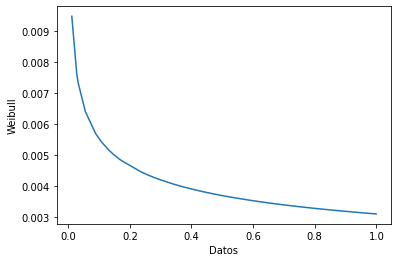

In [247]:
weib_dens_res = []

for i in data:
  weib_dens_res.append(weib_dens(i,1500,k))

plt.plot(data, weib_dens_res) # generación de datos aleatorios
plt.ylabel('Weibull')
plt.xlabel('Datos')
plt.show()

## Distribución de probabilidad
En este caso los datos aleatorios (data) representan el número de horas y la función me devolverá el procentaje de máquinas que fallarán en ese tiempo



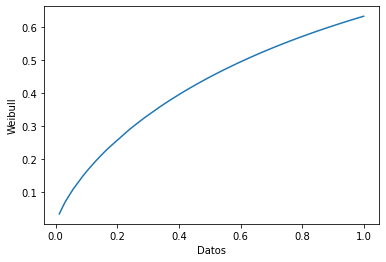

In [218]:
weib_res = []

for i in data:
  weib_res.append(weibull_distribution(l,i,k))

plt.plot(data, weib_res)
plt.ylabel('Weibull')
plt.xlabel('Datos')
plt.show()

## Transformada inversa
En este caso los datos aleatorios (data) aleatorios representan un porcentaje da máquinas que fallarán y la función me devolverá el tiempo de vida útil de las máquinas con ese porcentaje

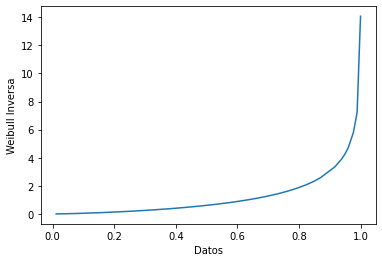

In [253]:
weib_res_inv = []

for i in data:
  weib_res_inv.append(weibull_distribution_inverse(l,i,k))

plt.plot(data, weib_res_inv)
plt.ylabel('Weibull Inversa')
plt.xlabel('Datos')
plt.show()

## Resultados

In [260]:
aux = {'ri': data, '% de fallo': weib_res, 'Inversa': weib_res_inv, 'Inversa x1500hr (Vida útil estimada)': [element * 1500 for element in weib_res_inv]}
df = pd.DataFrame(aux)
df.sample(10) # Tomar una muestra aleatoria de todos los datos

,ri,% de fallo,Inversa,Inversa x1500hr (Vida útil estimada)
56,0.664018,0.520777,1.122725,1684.086861
30,0.441068,0.417966,0.485617,728.424847
54,0.649692,0.515023,1.065784,1598.675834
29,0.434555,0.414461,0.472764,709.146394
55,0.650117,0.515195,1.067428,1601.142701
6,0.130572,0.195242,0.072639,108.958843
98,0.988388,0.628898,7.331959,10997.938129
31,0.453155,0.424383,0.510101,765.150807
23,0.363432,0.373795,0.346540,519.810194
21,0.350045,0.365606,0.325415,488.122984


## Conlusiones y Recomendaciones

La transformada inversa nos ayuda a obtener información del comportamiento de nuestras variables aleatorias al igual que la función de distribución de la que proviene. Esta nos dará información directa al momento de solicitar la vida útil de nuestra máquina dada la proporción de máquinas a falla que puede ser útil para alocar maquinaria que ya tenga cierto número de horas en uso.